# Investment Fund Statistics

In this notebook, I will use data available at https://data.ecb.europa.eu/data/datasets to visualize investment fund statistics in a similar way as  in the overview charts available at https://www.ecb.europa.eu/stats/financial_corporations/investment_funds/html/index.de.html.

Possibly also time series analysis on top

### Libraries

For the purposes of this task, the standard libraries of pandas and matplotlib are sufficient.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### Preparing the data

In [57]:
inpath = "data/assets_outstanding_amounts.csv"
df_assets_oa = pd.read_csv(inpath)
df_assets_oa.head()

,DATE,TIME PERIOD,Total assets held by investment funds in the euro area (stock) (IVF.Q.U2.N.T0.T00.A.1.Z5.0000.Z01.E)
0,2000-12-31,2000Q4,3629068
1,2001-03-31,2001Q1,3559282
2,2001-06-30,2001Q2,3695055
3,2001-09-30,2001Q3,3343617
4,2001-12-31,2001Q4,3600123


We shorten the name of the numeric column for convenience:

In [58]:
df_assets_oa.rename(
    columns = {'Total assets held by investment funds  in the euro area (stock) (IVF.Q.U2.N.T0.T00.A.1.Z5.0000.Z01.E)':'assets'},
    inplace = True)

In [59]:
# To align with the ECB plot, we only look at data from 2015 onwards 
df_assets_oa = df_assets_oa.iloc[59:,:]

### Creating the Plot

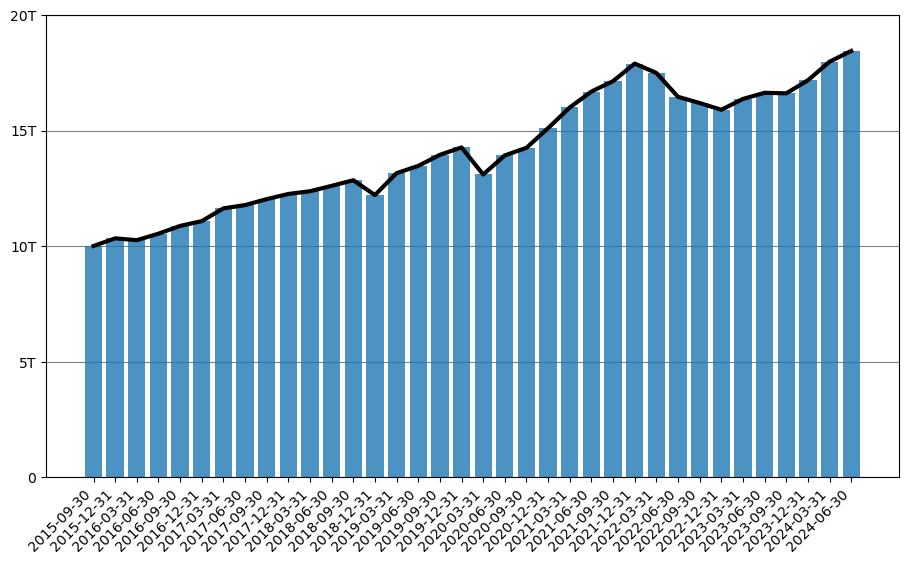

In [60]:
fig, ax = plt.subplots(figsize=(11, 6))

ax.plot(df_assets_oa.loc[:,'DATE'], df_assets_oa.loc[:,'assets'], color='black', linewidth=3) # line
ax.bar(df_assets_oa.loc[:,'DATE'], df_assets_oa.loc[:,'assets'], alpha=0.8) # bars

# x axis labels
plt.xticks(rotation=45, ha='right') # rotate x axis labels

# y axis range and labels
plt.ylim([0, 20000000]) # set y axis range
ylabels = ['0', '5T', '10T', '15T', '20T']
ax.set_yticks([0, 5000000, 10000000, 15000000, 20000000])
ax.set_yticklabels(ylabels)

# background
ax.yaxis.grid(color='gray')
ax.set_axisbelow(True)

plt.show()